# Credit Card Transaction Analysis

This notebook analyzes spending patterns across different categories over time.


In [ ]:
import sys
sys.path.insert(0, '../python/src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plan_a.cc_analysis import (
    load_transactions,
    add_analysis_categories,
    get_monthly_spending_by_category,
    get_category_summary,
    get_top_merchants_by_category,
    get_spending_trends
)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


## Load and Prepare Data


In [ ]:
# Load transaction data
df = load_transactions('../data/processed/all_transactions.csv')
df = add_analysis_categories(df)

print(f"Total transactions: {len(df):,}")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"\nTransactions by source:")
print(df['source'].value_counts())
print(f"\nTotal spending: ${df[df['amount'] > 0]['amount'].sum():,.2f}")


Total transactions: 1,691
Date range: 2024-06-29 to 2025-10-11

Transactions by source:
source
apple_card    1242
robinhood      360
venmo           89
Name: count, dtype: int64

Total spending: $79,303.71


## Monthly Spending by Category

Visualize spending trends across the key categories over time.


In [ ]:
# Get monthly spending data
target_categories = ['rent', 'utilities', 'dining_out', 'groceries', 'subway', 'taxi', 'shopping', 'subscriptions', 'home']
monthly_spending = get_spending_trends(df, categories=target_categories)

print("Monthly spending by category:")
print(monthly_spending.round(2))
print(f"\nTotal months analyzed: {len(monthly_spending)}")


Monthly spending by category:
analysis_category     rent  utilities  dining_out  groceries  subway     taxi  \
year_month                                                                      
2024-06-01            0.00       0.00        0.00       0.00    0.00     0.00   
2024-07-01            0.00       0.00      106.51       0.00   10.80     0.00   
2024-08-01         1107.25       0.00      595.15     154.32  148.40    12.00   
2024-09-01            0.00      64.51      697.12     221.61   87.00   507.03   
2024-10-01            0.00       0.00      112.33     182.32  116.50   862.26   
2024-11-01            0.00       0.00      470.94     365.21  131.00   152.72   
2024-12-01            0.00       0.00      447.50     166.78  152.25  1241.73   
2025-01-01            0.00       0.00        0.00       0.00    8.70   130.00   
2025-02-01            0.00      39.32      228.95     146.40  174.60     0.00   
2025-03-01            0.00       0.00      575.79      91.52  131.80    88.50  

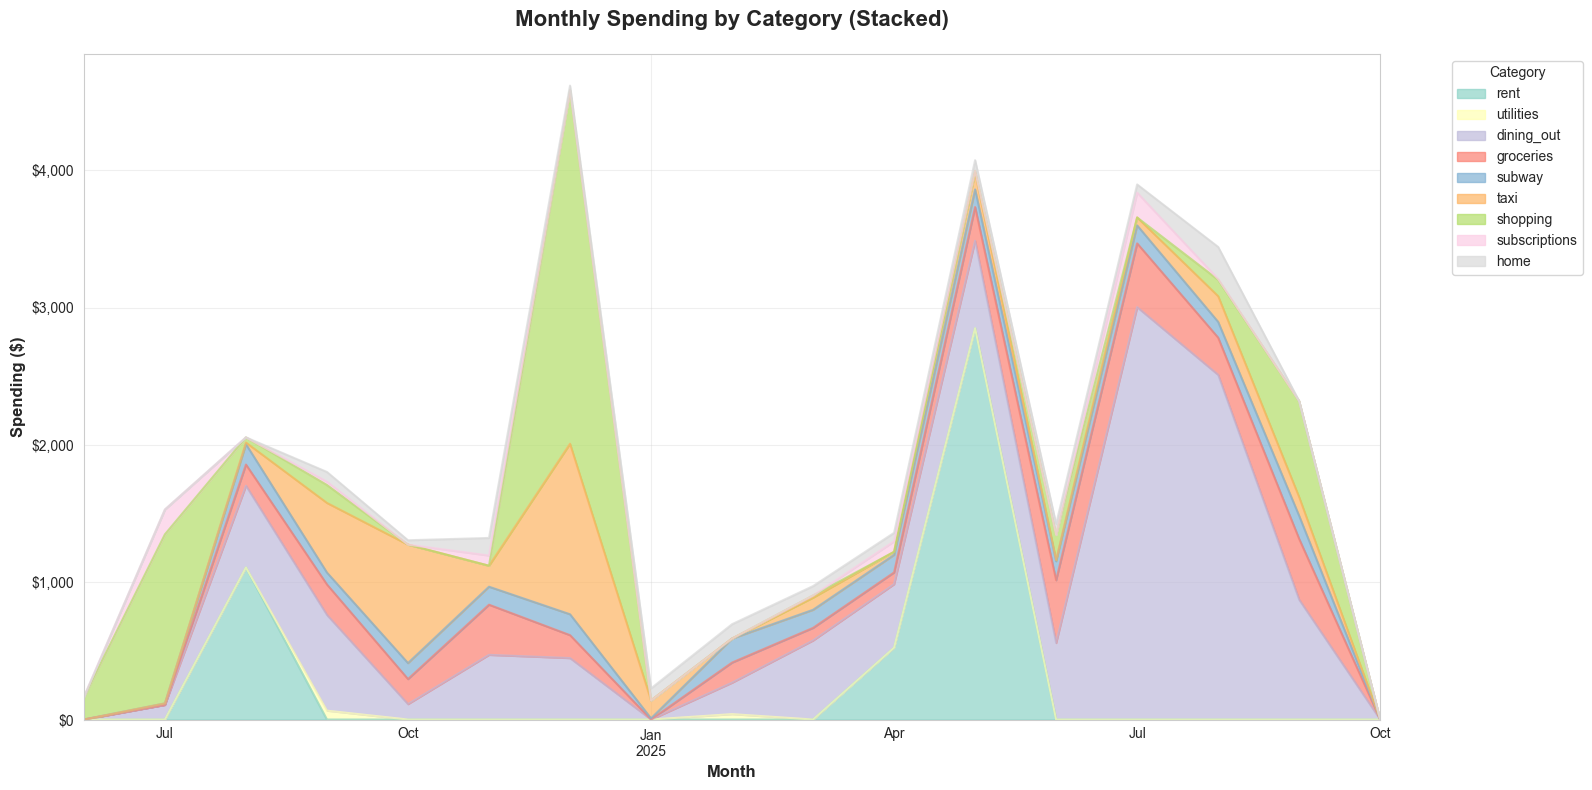

In [ ]:
# Stacked area chart showing spending over time
fig, ax = plt.subplots(figsize=(16, 8))

# Create color palette
colors = sns.color_palette("Set3", len(target_categories))

monthly_spending.plot(kind='area', stacked=True, ax=ax, color=colors, alpha=0.7)

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Spending ($)', fontsize=12, fontweight='bold')
ax.set_title('Monthly Spending by Category (Stacked)', fontsize=16, fontweight='bold', pad=20)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


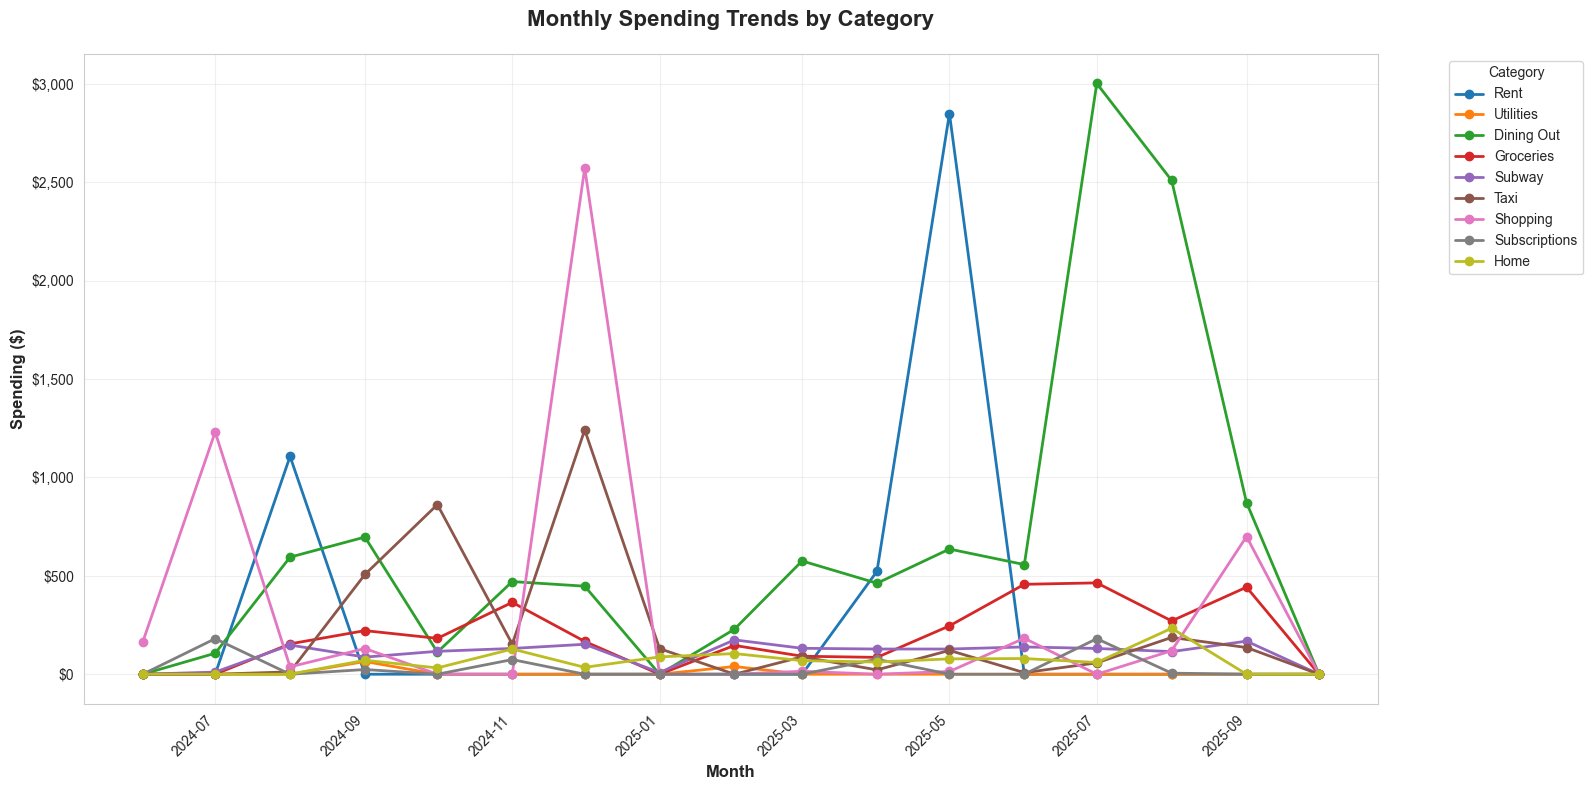

In [ ]:
# Line chart showing individual category trends
fig, ax = plt.subplots(figsize=(16, 8))

for category in target_categories:
    if category in monthly_spending.columns:
        ax.plot(monthly_spending.index, monthly_spending[category], marker='o', 
                label=category.replace('_', ' ').title(), linewidth=2, markersize=6)

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Spending ($)', fontsize=12, fontweight='bold')
ax.set_title('Monthly Spending Trends by Category', fontsize=16, fontweight='bold', pad=20)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Category Heatmap

Visualize spending intensity across months and categories.


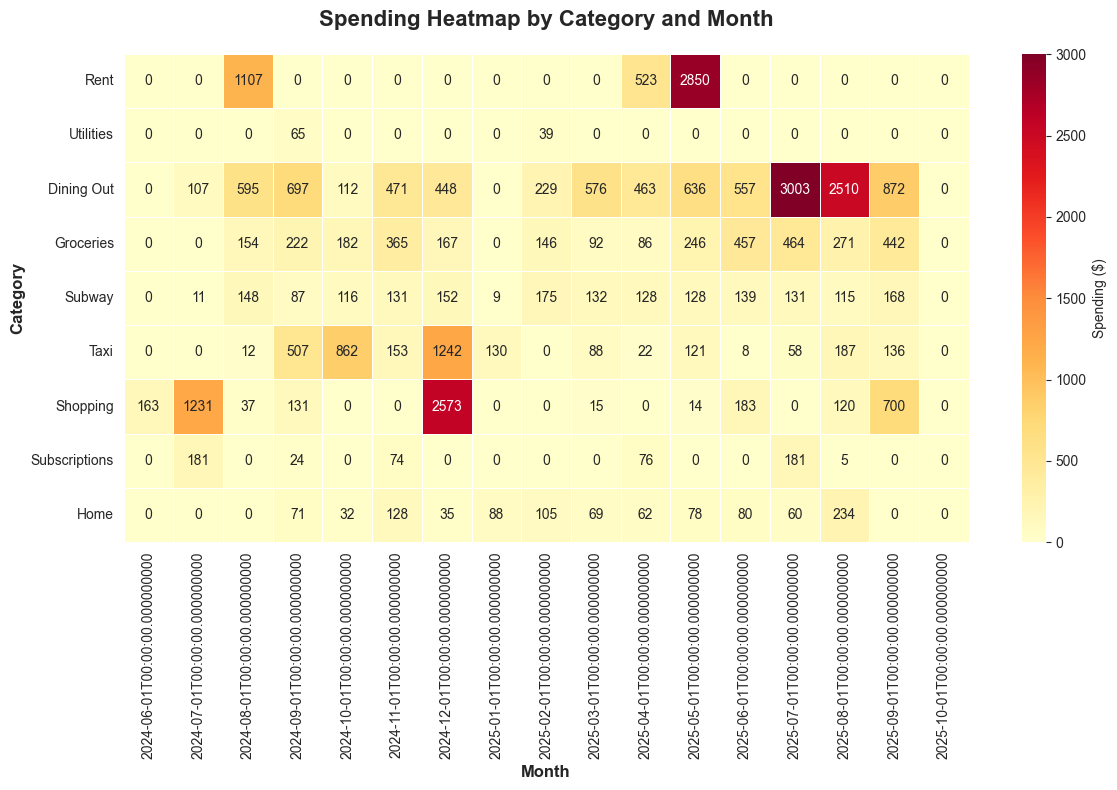

In [ ]:
# Heatmap of spending by category and month
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = monthly_spending.T

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Spending ($)'}, ax=ax, linewidths=0.5)

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Category', fontsize=12, fontweight='bold')
ax.set_title('Spending Heatmap by Category and Month', fontsize=16, fontweight='bold', pad=20)

# Format y-axis labels
ax.set_yticklabels([label.get_text().replace('_', ' ').title() for label in ax.get_yticklabels()], rotation=0)

plt.tight_layout()
plt.show()


## Summary Statistics by Category


In [ ]:
# Get summary statistics
summary = get_category_summary(df)
print("Overall spending by category:\n")
print(summary)


Overall spending by category:

                      total  count  average   median     min      max
analysis_category                                                    
other              48104.75    452   106.43    66.03    0.09  1866.07
dining_out         11275.67    271    41.61    26.13    1.10   329.92
shopping            5166.79     20   258.34   123.52    2.57  1300.00
rent                4480.34      3  1493.45  1107.25  523.09  2850.00
taxi                3525.88    106    33.26    22.33    2.21   236.79
groceries           3294.18    128    25.74    18.12    1.99   118.28
subway              1769.94    587     3.02     2.90    2.10    32.00
home                1041.02     18    57.83    61.00    6.74   130.50
subscriptions        541.31     12    45.11    34.99    0.44   130.64
utilities            103.83      8    12.98     6.38    4.32    35.00


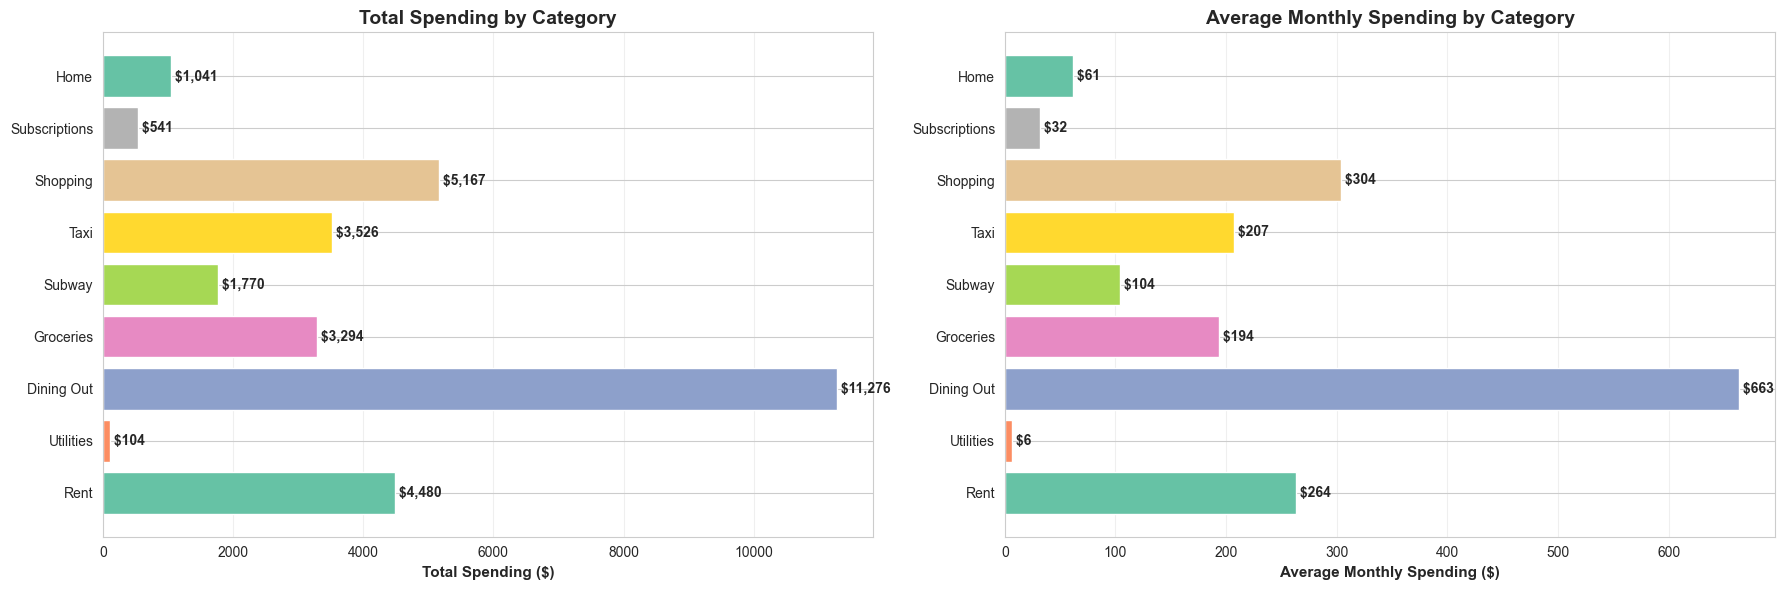

In [ ]:
# Bar chart of total spending by category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Total spending
target_summary = summary.loc[[cat for cat in target_categories if cat in summary.index]]
colors_bar = sns.color_palette("Set2", len(target_summary))

ax1.barh(range(len(target_summary)), target_summary['total'], color=colors_bar)
ax1.set_yticks(range(len(target_summary)))
ax1.set_yticklabels([idx.replace('_', ' ').title() for idx in target_summary.index])
ax1.set_xlabel('Total Spending ($)', fontsize=11, fontweight='bold')
ax1.set_title('Total Spending by Category', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(target_summary['total']):
    ax1.text(v, i, f' ${v:,.0f}', va='center', fontweight='bold')

# Average monthly spending
monthly_avg = monthly_spending.mean().sort_values(ascending=True)
monthly_avg = monthly_avg[[cat for cat in target_categories if cat in monthly_avg.index]]

ax2.barh(range(len(monthly_avg)), monthly_avg.values, color=colors_bar)
ax2.set_yticks(range(len(monthly_avg)))
ax2.set_yticklabels([idx.replace('_', ' ').title() for idx in monthly_avg.index])
ax2.set_xlabel('Average Monthly Spending ($)', fontsize=11, fontweight='bold')
ax2.set_title('Average Monthly Spending by Category', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(monthly_avg.values):
    ax2.text(v, i, f' ${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


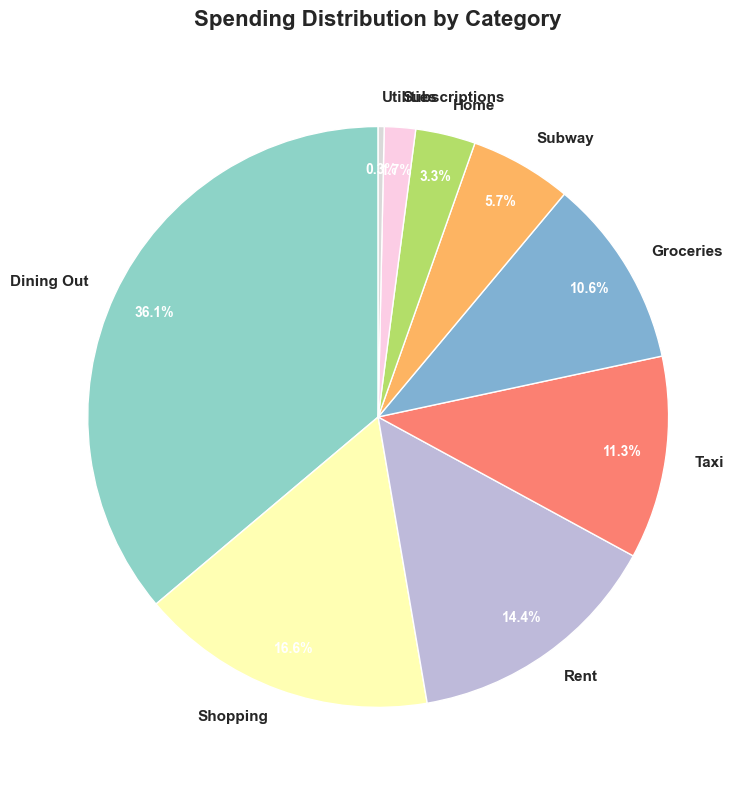

In [ ]:
# Pie chart showing spending distribution
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate total spending by category
category_totals = monthly_spending.sum().sort_values(ascending=False)

# Create pie chart
colors_pie = sns.color_palette("Set3", len(category_totals))
wedges, texts, autotexts = ax.pie(category_totals.values, 
                                    labels=[label.replace('_', ' ').title() for label in category_totals.index],
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors_pie,
                                    pctdistance=0.85)

# Enhance text
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax.set_title('Spending Distribution by Category', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


## Top Merchants by Category

Identify where most spending occurs within each category.


In [ ]:
# Show top merchants for key categories
categories_to_analyze = ['dining_out', 'groceries', 'subway', 'taxi', 'shopping']

for category in categories_to_analyze:
    print(f"\n{'='*60}")
    print(f"Top 10 Merchants - {category.replace('_', ' ').title()}")
    print('='*60)
    
    top_merchants = get_top_merchants_by_category(df, category, n=10)
    
    if not top_merchants.empty:
        print(top_merchants.to_string())
    else:
        print(f"No data available for {category}")



Top 10 Merchants - Dining Out
                                 total_spent  num_transactions
merchant                                                      
Santa Fe Bk                           656.50                15
Lilia                                 407.28                 3
Il Fiorista Nomad                     329.92                 1
Desert Five Spot                      324.60                 1
Kijitora                              296.40                20
Eight & Driggs Wine and Liquors       280.78                 5
Misipasta                             262.85                 1
Oxomoco                               253.45                 1
Bar Baserri                           249.98                 1
Mos General                           221.29                 2

Top 10 Merchants - Groceries
                        total_spent  num_transactions
merchant                                             
My Business                  853.00                21
Wholefds Wbg#10487   

## Month-over-Month Changes

Track how spending changes from month to month.


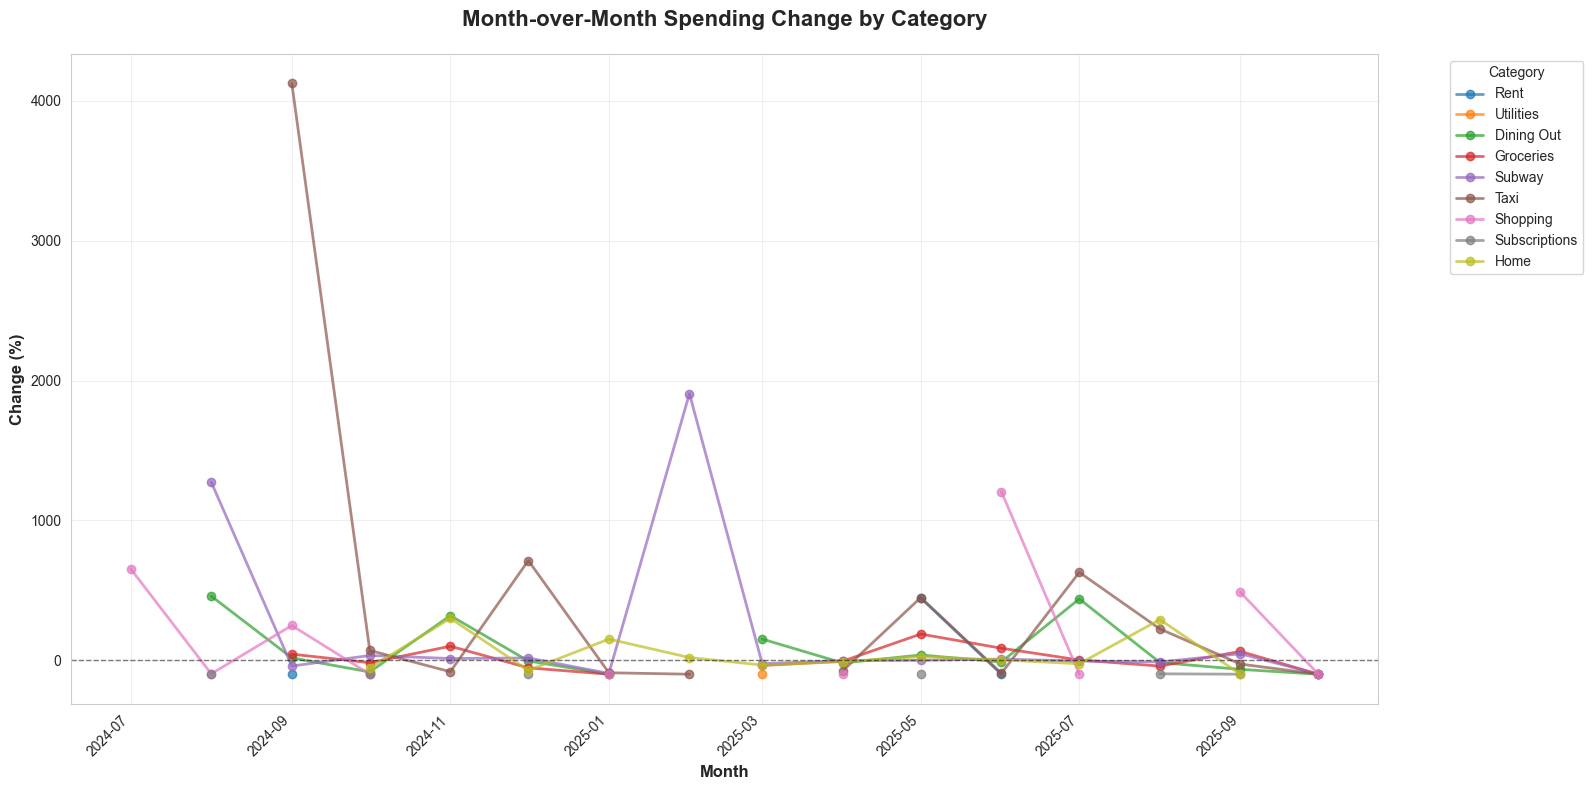

In [ ]:
# Calculate month-over-month percentage change
mom_change = monthly_spending.pct_change() * 100

# Plot month-over-month changes
fig, ax = plt.subplots(figsize=(16, 8))

for category in target_categories:
    if category in mom_change.columns:
        ax.plot(mom_change.index[1:], mom_change[category][1:], marker='o', 
                label=category.replace('_', ' ').title(), linewidth=2, markersize=6, alpha=0.7)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Change (%)', fontsize=12, fontweight='bold')
ax.set_title('Month-over-Month Spending Change by Category', fontsize=16, fontweight='bold', pad=20)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Total Monthly Spending

Overall spending trends across all categories.


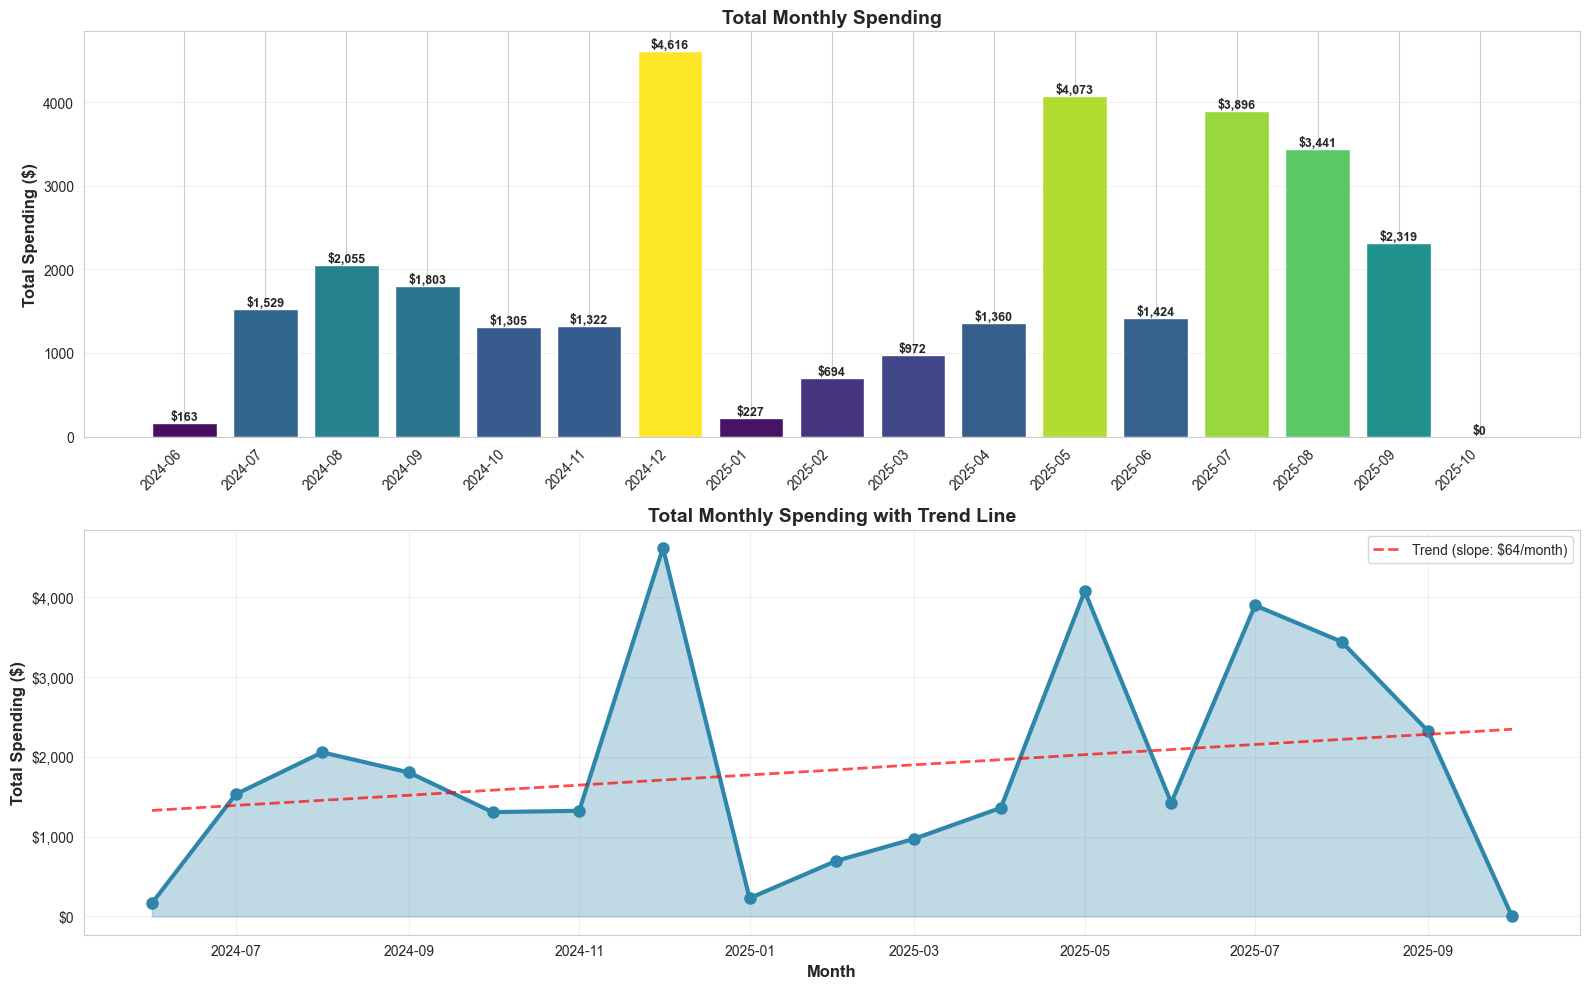


Total Spending Summary:
  Average monthly spending: $1,835.23
  Median monthly spending: $1,423.65
  Highest month: $4,616.02 (2024-12)
  Lowest month: $0.00 (2025-10)
  Total spending (all time): $31,198.96


In [ ]:
# Calculate total monthly spending
monthly_spending['total'] = monthly_spending.sum(axis=1)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Bar chart of total monthly spending
colors_gradient = plt.cm.viridis(monthly_spending['total'] / monthly_spending['total'].max())
bars = ax1.bar(range(len(monthly_spending)), monthly_spending['total'], color=colors_gradient)
ax1.set_xticks(range(len(monthly_spending)))
ax1.set_xticklabels([date.strftime('%Y-%m') for date in monthly_spending.index], rotation=45, ha='right')
ax1.set_ylabel('Total Spending ($)', fontsize=12, fontweight='bold')
ax1.set_title('Total Monthly Spending', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, monthly_spending['total'])):
    ax1.text(bar.get_x() + bar.get_width()/2, val, f'${val:,.0f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Line chart with trend
ax2.plot(monthly_spending.index, monthly_spending['total'], marker='o', 
         linewidth=3, markersize=8, color='#2E86AB')
ax2.fill_between(monthly_spending.index, monthly_spending['total'], alpha=0.3, color='#2E86AB')

# Add trend line
from scipy import stats
x_numeric = range(len(monthly_spending))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, monthly_spending['total'])
trend_line = [slope * x + intercept for x in x_numeric]
ax2.plot(monthly_spending.index, trend_line, '--', linewidth=2, color='red', 
         label=f'Trend (slope: ${slope:,.0f}/month)', alpha=0.7)

ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Spending ($)', fontsize=12, fontweight='bold')
ax2.set_title('Total Monthly Spending with Trend Line', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Format y-axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTotal Spending Summary:")
print(f"  Average monthly spending: ${monthly_spending['total'].mean():,.2f}")
print(f"  Median monthly spending: ${monthly_spending['total'].median():,.2f}")
print(f"  Highest month: ${monthly_spending['total'].max():,.2f} ({monthly_spending['total'].idxmax().strftime('%Y-%m')})")
print(f"  Lowest month: ${monthly_spending['total'].min():,.2f} ({monthly_spending['total'].idxmin().strftime('%Y-%m')})")
print(f"  Total spending (all time): ${monthly_spending['total'].sum():,.2f}")
